# Data Wrangling Template

## Gather

In [2]:
import zipfile
import pandas as pd

In [3]:
# Extract all contents from zip file
with zipfile.ZipFile('armenian-online-job-postings.zip', 'r') as myzip:
    myzip.extractall()

In [4]:
# Read CSV
df = pd.read_csv('online-job-postings.csv')
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


## Assess

In [5]:
df.info()
#df.tail()
df['Year'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

2012    2149
2015    2009
2013    2009
2014    1983
2008    1785
2011    1697
2007    1538
2010    1511
2009    1191
2005    1138
2006    1116
2004     875
Name: Year, dtype: int64

## Clean
#### Define
#### Code

 - Select all records in the StartDate column that have "As soon as possible", "immediately", etc. and replace the text in those cells with "ASAP"


In [17]:
df_clean = df.copy()
# df_clean.head()

In [18]:
df_clean = df_clean.rename(columns={'ApplicationP' : 'ApplicationProcedure',
                                   'AboutC' : 'AboutCompany',
                                   'RequiredQual' : 'RequiredQualifications',
                                   'JobRequirment' : 'JobRequirements'})
df_clean.head(0)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationProcedure,OpeningDate,Deadline,Notes,AboutCompany,Attach,Year,Month,IT


 - Select all nondescriptive and misspelled column headerse (ApplicationP, AboutC, RequiredQual, JobRequiment) and replace them with full words (ApplicationPRoceedure, AboutCompany, RequiredQualifications, JobRequirement)

In [19]:
df_clean.StartDate.value_counts()


ASAP                                                4754
Immediately                                          773
As soon as possible                                  543
Upon hiring                                          261
Immediate                                            259
                                                    ... 
The assignment will commence on October 1, 2004.       1
21 December 2006                                       1
17 December 2008                                       1
On/ about 06 March 2015 - 07 June 2016                 1
07 April 2008                                          1
Name: StartDate, Length: 1186, dtype: int64

#### Test

In [22]:
asap_list = ['Immediately', 'As soon as possible']

for phrase in asap_list:
    df_clean.StartDate.replace(phrase, 'ASAP', inplace=True)
    
df_clean.StartDate.value_counts()

ASAP                                                6070
Upon hiring                                          261
Immediate                                            259
Immediate employment                                 140
As soon as possible.                                  32
                                                    ... 
The assignment will commence on October 1, 2004.       1
17 December 2008                                       1
21 December 2006                                       1
On/ about 06 March 2015 - 07 June 2016                 1
07 April 2008                                          1
Name: StartDate, Length: 1184, dtype: int64

In [26]:
for phrase in asap_list:
    assert phrase not in df_clean.StartDate.values

# assert 2 + 2 == 4
# no error means we are good!

# Analysis and Visualization

In [34]:
# number of 'ASAP' start dates (numerator)
asap_counts = df_clean.StartDate.value_counts()['ASAP']
asap_counts

6070

In [36]:
# number of non-empty start dates (denominator)
non_empty_counts = df_clean.StartDate.count()
non_empty_counts

9675

In [37]:
asap_counts/non_empty_counts

0.6273901808785529

<AxesSubplot:ylabel='StartDate'>

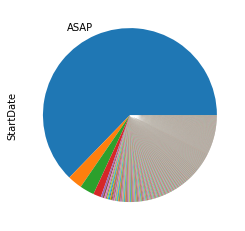

In [47]:
%matplotlib inline
import numpy as np

# this will help clean up the labels in the pie chart!
labels = np.full(len(df_clean.StartDate.value_counts()), "", dtype=object)
labels[0] = 'ASAP'

df_clean.StartDate.value_counts().plot(kind="pie", labels=labels)

# data analysis before

In [44]:
# number of 'ASAP' start dates (numerator)
asap_counts1 = df.StartDate.value_counts()['ASAP']
asap_counts1

# number of non-empty start dates (denominator)
non_empty_counts1 = df.StartDate.count()
non_empty_counts1

asap_counts1/non_empty_counts1

0.4913695090439276

<AxesSubplot:ylabel='StartDate'>

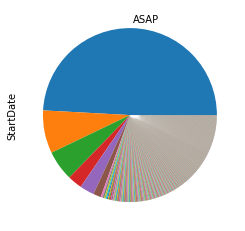

In [46]:
labels1 = np.full(len(df.StartDate.value_counts()), "", dtype=object)
labels1[0] = 'ASAP'

df.StartDate.value_counts().plot(kind="pie", labels=labels1)